In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [85]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [86]:
df.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

In [87]:
df.count()

person_age                        45000
person_gender                     45000
person_education                  45000
person_income                     42750
person_emp_exp                    45000
person_home_ownership             45000
loan_amnt                         45000
loan_intent                       45000
loan_int_rate                     45000
loan_percent_income               45000
cb_person_cred_hist_length        45000
credit_score                      45000
previous_loan_defaults_on_file    45000
loan_status                       45000
dtype: int64

Hal pertama yang bisa dilihat adalah data cukup bagus, hanya ada 1 kolom yang memiliki missing value, jadi tidak merupakan masalah besar. Terdapat banyak kolom yang berbentuk objek, dan harus di urus nantinya

C:\Users\kevin\AppData\Local\Temp\ipykernel_21664\3581642939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


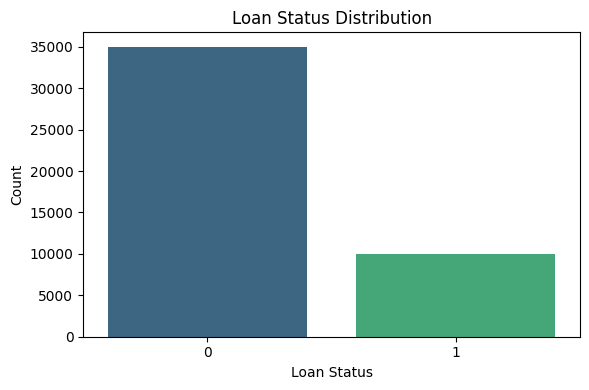

In [88]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Terlihat datanya lumayan berat kearah loan yang ditolak, sehingga bisa mempengaruhi model nantinya

In [89]:
df = df.dropna()

Karena data yang missing berjumlah sedikit relatif ke total jumlah, 2250 / 45000 maka bisa di drop saja

In [90]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

person_gender: ['female' 'male' 'Male' 'fe male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


Terlihat disini kalau untuk data kategorikal, banyak penulisan tidak konsisten dan salah, maka perlu diubah menjadi hal yang konsisten dlu, dengan di map

In [91]:
gender_mapping = {
    'female': 'Female',
    'fe male': 'Female',
    'male': 'Male',
    'Male': 'Male'
}

education_mapping = {
    'master': 'Master',
    'high school': 'HighSchool',
    'bachelor': 'Bachelor',
    'associate': 'Associate',
    'doctorate': 'Doctorate'
}

home_ownership_mapping = {
    'RENT': 'Rent',
    'OWN': 'Own',
    'MORTGAGE': 'Mortgage',
    'OTHER': 'Other'
}

loan_intent_mapping = {
    'PERSONAL': 'Personal',
    'EDUCATION': 'Education',
    'MEDICAL': 'Medical',
    'VENTURE': 'Venture',
    'HOMEIMPROVEMENT': 'Home Improvement',
    'DEBTCONSOLIDATION': 'Debt Consolidation'
}

loan_default_mapping = {
    'No': 'No',
    'Yes': 'Yes'
}

df['person_gender'] = df['person_gender'].str.lower().map(gender_mapping)

df['person_education'] = df['person_education'].str.lower().map(education_mapping)

df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)

df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)

df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(loan_default_mapping)


In [92]:
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

person_gender: ['Female' 'Male']
person_education: ['Master' 'HighSchool' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['Rent' 'Own' 'Mortgage' 'Other']
loan_intent: ['Personal' 'Education' 'Medical' 'Venture' 'Home Improvement'
 'Debt Consolidation']
previous_loan_defaults_on_file: ['No' 'Yes']


Terlihat datanya sudah lebih rapih

In [93]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.7)

data di split menjadi X dan Y, lalu dibagi untuk train dan test. Sekaligus untuk data yang berbentuk categorical bisa diencode dlu

In [96]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [97]:
numeric_features = ['person_age', 'person_income', 'person_emp_exp', 
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length', 'credit_score']

scaler = StandardScaler()
x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.fit_transform(x_test[numeric_features])

Setelah diencode, data di scale supaya bisa lebih mudah untuk di train

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

In [99]:
y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

In [100]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9150
AUC-ROC: 0.9630
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9994
           1       0.83      0.78      0.80      2832

    accuracy                           0.92     12826
   macro avg       0.88      0.87      0.87     12826
weighted avg       0.91      0.92      0.91     12826



In [101]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=5)
xgb_model.fit(x_train, y_train)

d:\KEVIN\0SLC\Qualification\Deep Learning\enviroments\deep_learning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [102]:
y_pred_xgb = xgb_model.predict(x_test)
y_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

In [103]:
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.9080
AUC-ROC: 0.9615
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9994
           1       0.79      0.80      0.79      2832

    accuracy                           0.91     12826
   macro avg       0.87      0.87      0.87     12826
weighted avg       0.91      0.91      0.91     12826



Untuk perbandingan, terlihat kalau RandomForest memiliki Accuracy 0.915, dan XGBoost accuracy 0.908. Secara keselurhan juga, lebih tinggi F1-Score untuk RandomForest, dengan 0.95 dan 0.8 dibandingkan 0.94 dan 0.79, perbedaan yang minim. Randomforest sedikit lebih bagus, maka model yang digunakan adalah random forest